# Data Science Challenge: Trips!
 JH - Workday ID (C929674)
 

In [87]:
# load some default Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import xgboost as xgb
import lightgbm as lgb 
import calendar

from scipy import stats
from scipy.stats import lognorm
from math import radians, cos, sin, asin, sqrt 
from tqdm import tqdm_notebook
from pylab import rcParams
from tabulate import tabulate

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import make_scorer

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, roc_auc_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
palette = sns.color_palette('Paired', 10)
%matplotlib inline
plt.subplots_adjust(left=0.4 , bottom=0.1, right=0.9, top=2.5, wspace=1)

<Figure size 432x288 with 0 Axes>

# Question 1:
**a) programmatically download and load into your favorite analytical tool the trip data for September 2015.**

In [0]:
# read data in pandas dataframe
df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv')

In [89]:
# list first five rows
df.head(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [90]:
# look at the shape of data
print (df.shape)

(1494926, 21)


In [91]:
# check datatypes
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object

In [92]:
# check statistics of the features
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


# Question 1:
**b) Report how many rows and columns of data you have loaded.**

In [93]:
# Print the size of the dataset
# 0 for row & 1 for column
row_count = df.shape[0] 
column_count = df.shape[1]
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Number of rows: 1494926
Number of columns: 21


Which shows 1,494,926 Trips!

In [94]:
# A bit of data cleaning before moving further 
print(df.Fare_amount.min(), df.Fare_amount.max())

-475.0 580.5


The minium fare amount is negative. As this does not seem to be realistic, I droped them from the data.

In [95]:
print(f"There are {len(df[df['Fare_amount'] < 0])} negative fares.")
print(f"There are {len(df[df['Fare_amount'] == 0])} $0 fares.")
print(f"There are {len(df[df['Fare_amount'] > 199])} fares greater than $199.")

There are 2417 negative fares.
There are 4468 $0 fares.
There are 163 fares greater than $199.


In [96]:
print('Old size: %d' % len(df))
df = df[df.Fare_amount>=0]
print('New size: %d' % len(df))

Old size: 1494926
New size: 1492509


In [97]:
print(df.isnull().sum())

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1492509
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
dtype: int64


# Question 2:
**a) Plot a histogram of the number of the trip distance (“Trip Distance”).**

In [98]:
Trip_distance = df['Trip_distance']
Trip_distance.head(5)

0    0.00
1    0.00
2    0.59
3    0.74
4    0.61
Name: Trip_distance, dtype: float64

In [0]:
# maximum  and minimum of trip distances
max_Trip_distance = df['Trip_distance'].max() 
min_Trip_distance = df['Trip_distance'].min() 

In [100]:
print("Maximum trip distance:", max_Trip_distance, "miles")
print("Minimum trip distance:", min_Trip_distance, "miles")

Maximum trip distance: 603.1 miles
Minimum trip distance: 0.0 miles


In [101]:
# trip distance value count
trip_distance_value_count = df['Trip_distance'].value_counts()
trip_distance_value_count.head(5)

0.0    19986
1.0    16735
0.9    16691
0.8    16142
1.1    16070
Name: Trip_distance, dtype: int64

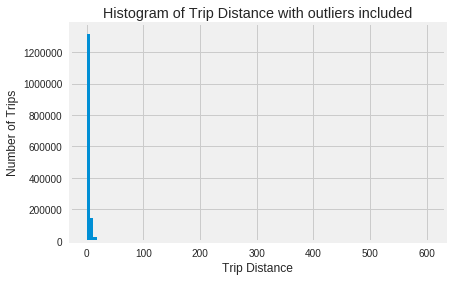

In [102]:
# This is a first histogram (with outliers)
_ = plt.hist(df['Trip_distance'],bins=100)
_ = plt.title('Histogram of Trip Distance with outliers included')
_ = plt.xlabel('Trip Distance')
_ = plt.ylabel('Number of Trips')
plt.show()

As we can see, big chunk of trip are less than 30 miles. 
Let us now plot the filtered Trip distance

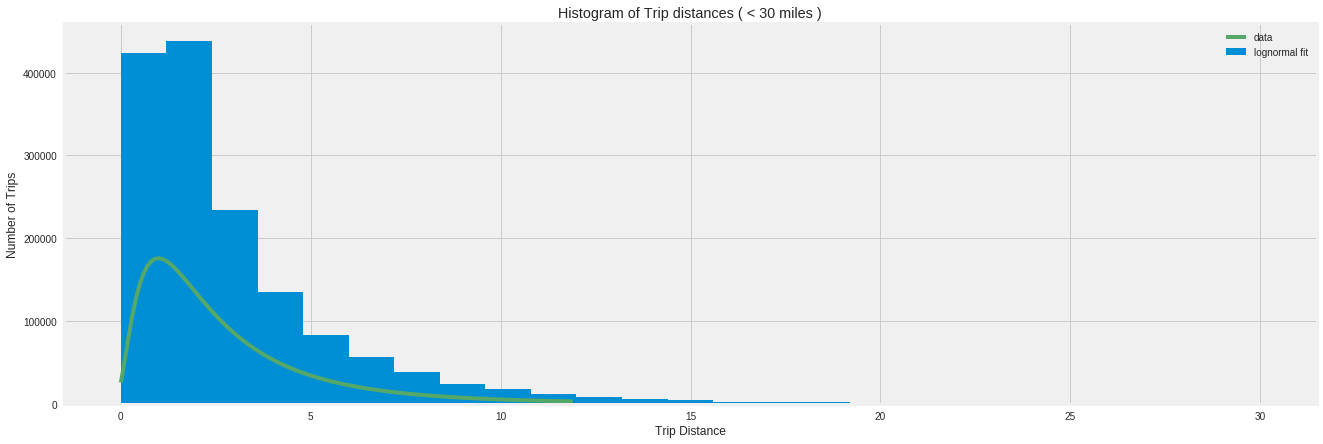

In [103]:
# We can apply a lognormal here, by using the mean of trip distance
fig,ax = plt.subplots(1,figsize = (20, 7)) 
ax.set_xlabel('Trip Distance')
ax.set_ylabel('Number of Trips')
ax.set_title('Histogram of Trip distances ( < 30 miles )')
plt.hist(df['Trip_distance'][df['Trip_distance']<30],bins = 25)
scatter,loc,mean = lognorm.fit(df.Trip_distance.values,
                               scale=df.Trip_distance.mean(),
                               loc=0)
pdf_fitted = lognorm.pdf(np.arange(0,12,.1),scatter,loc,mean)
ax.plot(np.arange(0,12,.1),600000*pdf_fitted,'g') 
ax.legend(['data','lognormal fit'])
plt.show()

 # Question 2: 
**b) Report any structure you find and any hypotheses you have about that structure**

**The Trip Distance** is asymmetrically distributed. It is *skewed to the right* and it has a median smaller than its mean and both smaller than the standard deviation. The skewness is due to the fact that the variable has a lower boundary of 0. The distance can't be negative. This distribution has a structure of a lognormal distribution. To the left is plotted the distribution of the entire raw set of Trip distance. To the right, outliers have been removed before plotting. 

**The hypothesis:** The trips are not random. If there were random, we would have a Gaussian distribution. The non-zero autocorrelation may be related to the fact that people taking ride are pushed by a common cause, for instance, people rushing to work.

 Now let's look at Trip Distance variations. 
 We will first convert datetime variables to pandas datetime series.

In [0]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime']) # change pickuptime to datetime 
df['Lpep_dropoff_datetime'] = pd.to_datetime(df['Lpep_dropoff_datetime'])# change drop off to datetime 
df['HourOfDay'] = df['lpep_pickup_datetime'].dt.hour # Obtain time of day variable
df['DayofWeek'] = df['lpep_pickup_datetime'].dt.dayofweek # get the day of week variable

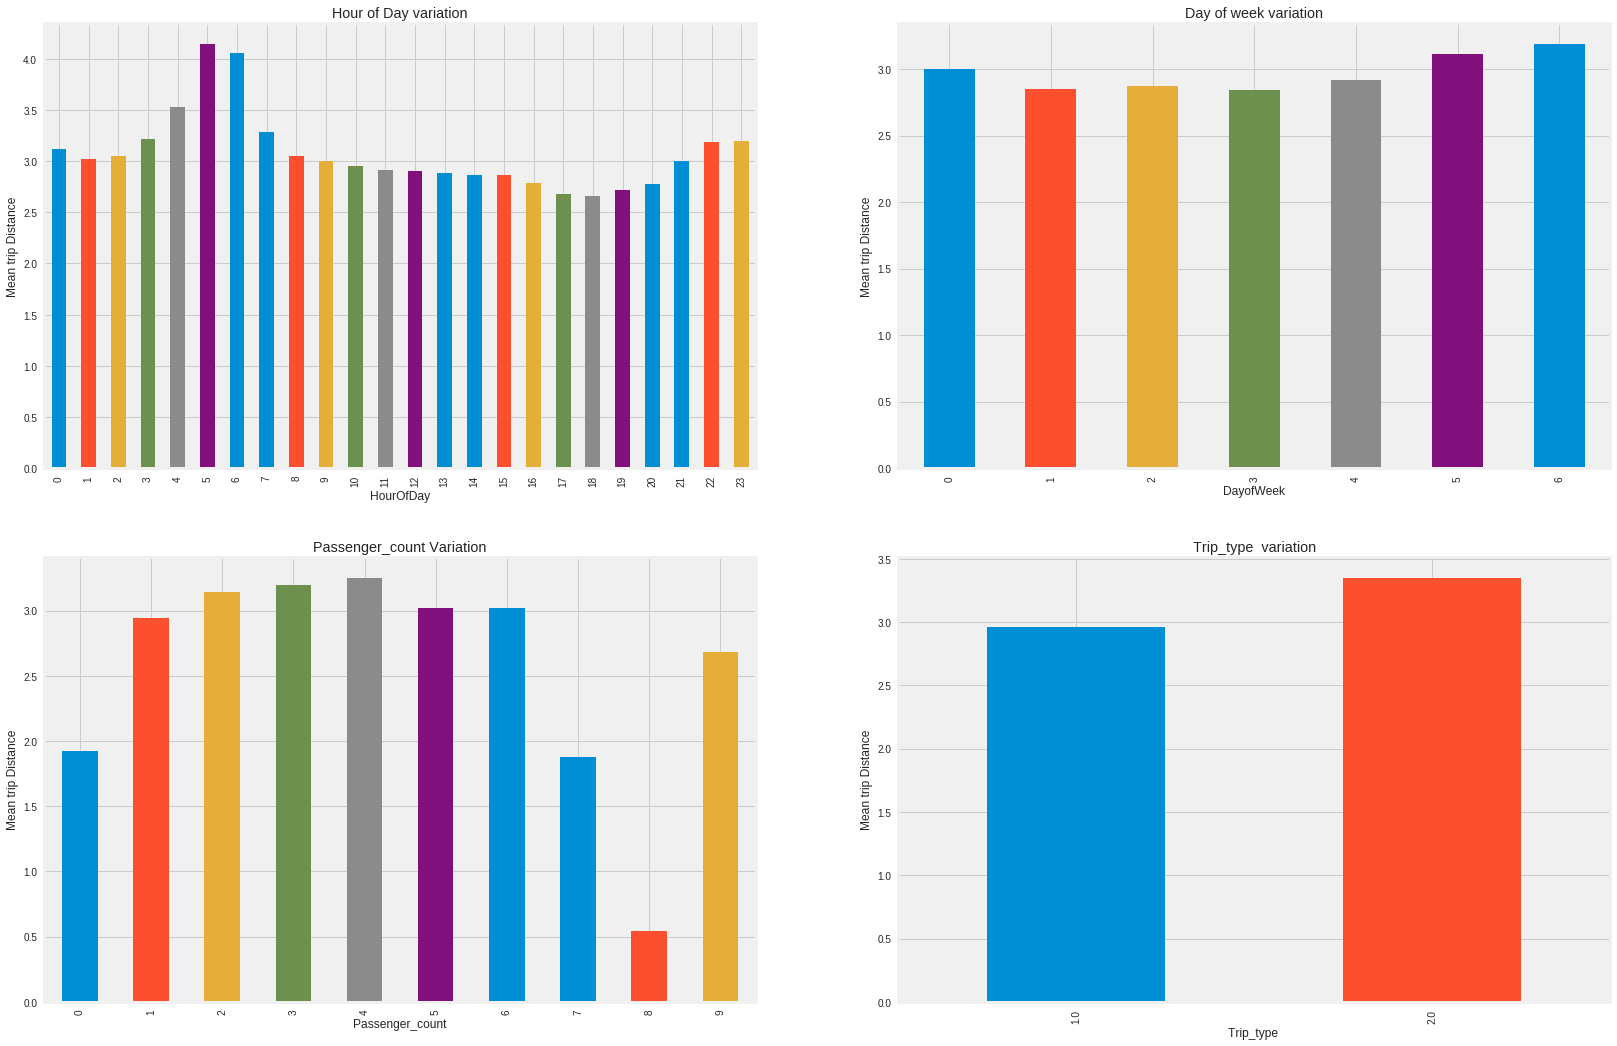

In [105]:
rcParams['figure.figsize'] = 25, 18
plt.subplot(2,2, 1)
df.groupby('HourOfDay')['Trip_distance'].mean().plot(kind='bar')
plt.title('Hour of Day variation')
plt.ylabel('Mean trip Distance')

plt.subplot(2, 2, 2)
df.groupby('DayofWeek')['Trip_distance'].mean().plot(kind='bar')
plt.title('Day of week variation')
plt.ylabel('Mean trip Distance')

plt.subplot(2,2, 3)
df.groupby('Passenger_count')['Trip_distance'].mean().plot(kind='bar')
plt.title('Passenger_count Variation')
plt.ylabel('Mean trip Distance')

plt.subplot(2, 2, 4)
df.groupby('Trip_type ')['Trip_distance'].mean().plot(kind='bar')
plt.title('Trip_type  variation')
plt.ylabel('Mean trip Distance')

plt.show()

**Observation about mean trip distance:**
* Hour of Day:We can see long range trips in the morning and evenings.  I assume people commuting to work then, If so how do they get back home. The evening peak are shorter than the morning peak. I would hypothesize    that people are okay to take cabs in the morning to avoid being late to their early appointments while they would take public transportation in the evening.
* Day of Week: People tend to travel farther distances during weekends.
* PassangerCount : Upto 4 passengers tend to travel farther distances than 1 or 2 passengers.
* Trip type : Passengers from a dispatch tend to travel farther than street hail calls by about 0.5 miles.

# Question 3)
**a) Report mean and median trip distance grouped by hour of day.**

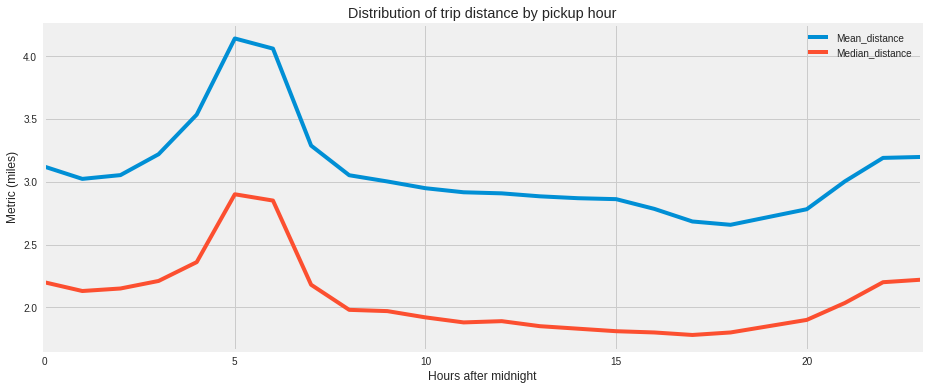

-----Trip distance by hour of the day-----

  Hour    Mean distance    Median distance
------  ---------------  -----------------
     0          3.12081              2.2
     1          3.02256              2.13
     2          3.0526               2.15
     3          3.21879              2.21
     4          3.53405              2.36
     5          4.14036              2.9
     6          4.05958              2.85
     7          3.28769              2.18
     8          3.05158              1.98
     9          3.00203              1.97
    10          2.94825              1.92
    11          2.91594              1.88
    12          2.90741              1.89
    13          2.88371              1.85
    14          2.86875              1.83
    15          2.86123              1.81
    16          2.78391              1.8
    17          2.68344              1.78
    18          2.65704              1.8
    19          2.71907              1.85
    20          2.781             

In [106]:
# I will generate the table but also generate a plot for a better visualization
fig,ax = plt.subplots(1,1,figsize=(14,6)) 

# use a pivot table to aggregate Trip_distance by hour
table1 = df.pivot_table(index='HourOfDay', values='Trip_distance',aggfunc=('mean','median')).reset_index()

# rename columns
table1.columns = ['HourOfDay','Mean_distance','Median_distance']
table1[['Mean_distance','Median_distance']].plot(ax=ax)

plt.ylabel('Metric (miles)')
plt.xlabel('Hours after midnight')
plt.title('Distribution of trip distance by pickup hour')
plt.xlim([0,23])

plt.show()
print ('-----Trip distance by hour of the day-----\n')
print (tabulate(table1.values.tolist(),["Hour","Mean distance","Median distance"]))

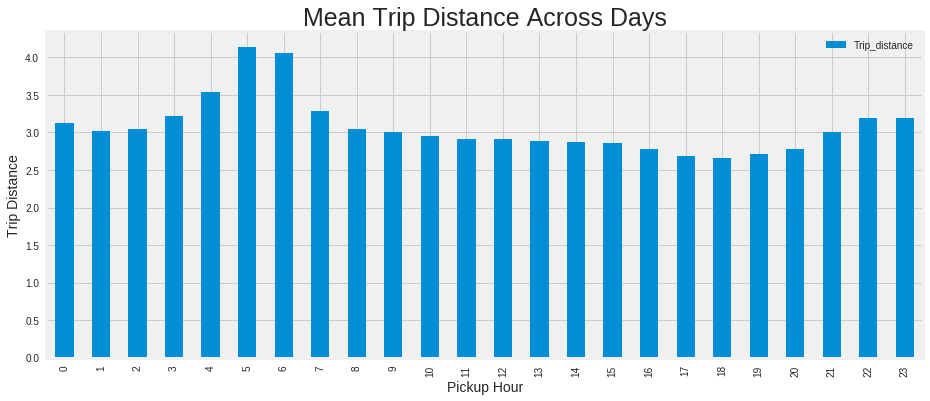

In [107]:
## Another way to look at the Mean and Meadian
rcParams['figure.figsize'] = 14, 6
_ = df[['Trip_distance','HourOfDay']].groupby('HourOfDay').mean().plot.bar()
_ = plt.title('Mean Trip Distance Across Days', fontsize = 25)
_ = plt.xlabel('Pickup Hour', fontsize = 14)
_ = plt.ylabel('Trip Distance', fontsize = 14)

plt.show()

Findings: It seems that the average trip distance for the "Green" cabs is relatively higher during the early hours( 4:00-7:00 AM).

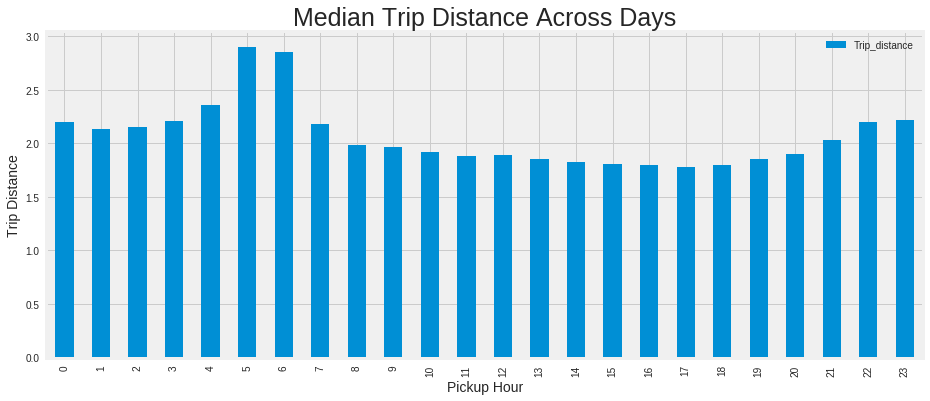

In [108]:
rcParams['figure.figsize'] = 14, 6
_ = df[['Trip_distance','HourOfDay']].groupby('HourOfDay').median().plot.bar()
_ = plt.title('Median Trip Distance Across Days', fontsize = 25)
_ = plt.xlabel('Pickup Hour', fontsize = 14)
_ = plt.ylabel('Trip Distance', fontsize = 14)
plt.show()

**Findings**
Looks like the median trip distance covered by the "Green" cabs is relatively lower at midnight(0-4 AM) when compared to the trips covered immediately after the sunrise(6-8 AM)

Sofar,  We plotted the mean and median of the trip distance across the hours of day.
I think  it is also interesting to see how trip distance changes across week. 
Similar to what we did at the end of question 2,  we can have a look at meadian acorss days of week.

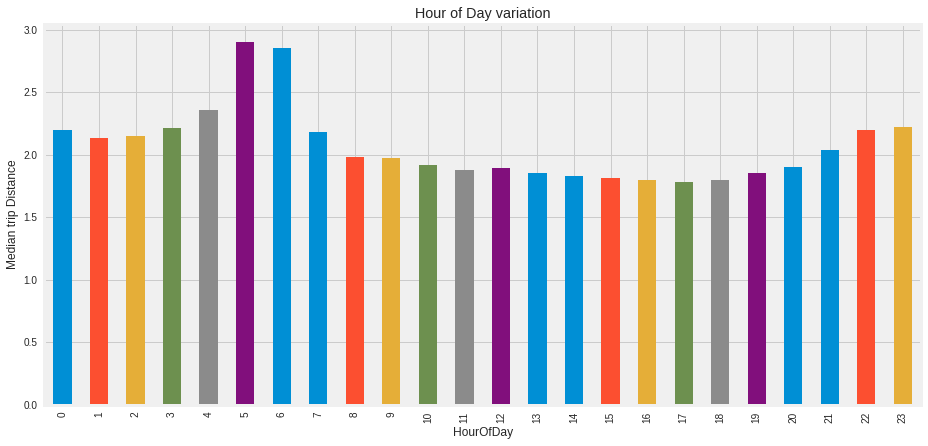

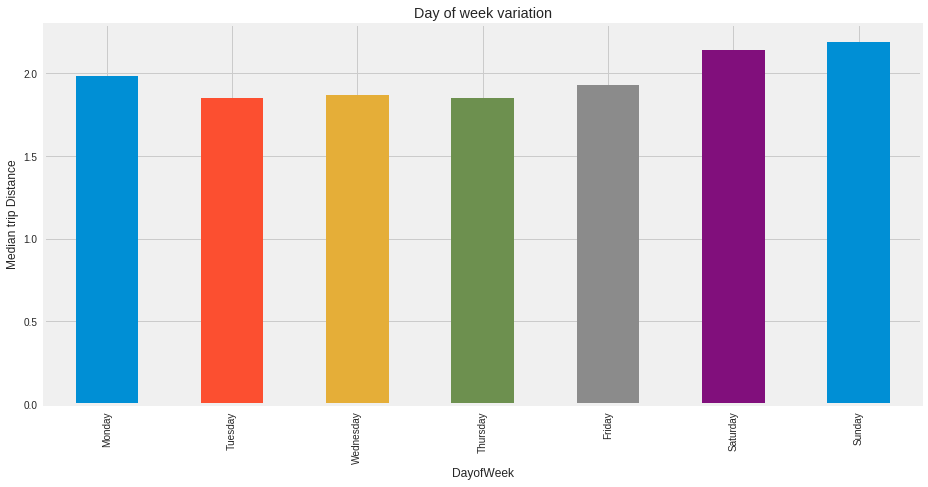

In [109]:
rcParams['figure.figsize'] = 14,7

df.groupby('HourOfDay')['Trip_distance'].median().plot(kind='bar')
plt.title('Hour of Day variation')
plt.ylabel('Median trip Distance')
plt.show()

df.groupby('DayofWeek')['Trip_distance'].median().plot(kind='bar')
plt.title('Day of week variation')
plt.ylabel('Median trip Distance')
days = [i for i in range(7)]
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

In addition to comments about Hour of day observations made above, it is clear that as the day progresses the median trip distance drops quite a bit. This can be potentially attributed to increasing traffic that may dissuade people from using cabs to travel farther distances and instead lead them to use the subway.

# Question 3:
**b) We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.**

For this part we have two different approaches, one is simply by using Rate Code ID, and the other one involves geo-analytics,
I have provided both here.

**b-1)Rate Code ID:**
The variable RateCodeID contains different values .  RateCodeID 2 is for JFK and 3 is for Newark airport

In [110]:
# counting the airport trips
airports_trips = df[(df.RateCodeID==2) | (df.RateCodeID==3)]
print ("Number of trips to/from NYC airports: ", airports_trips.shape[0])
print ("Average fare (calculated by the meter) of trips to/from NYC airports: $", airports_trips.Fare_amount.mean(),"per trip")
print ("Average total charged amount (before tip) of trips to/from NYC airports: $", airports_trips.Total_amount.mean(),"per trip")

Number of trips to/from NYC airports:  5410
Average fare (calculated by the meter) of trips to/from NYC airports: $ 51.488724584103515 per trip
Average total charged amount (before tip) of trips to/from NYC airports: $ 59.95789094269676 per trip


**b-2)Complex Approach:
 Location Data Preprocessing**

New York city coordinates are:

*   longitude = -74.0063889
*   lattitude = 40.7141667
So, I will plot a bounding box of interest by [long_min, long_max, latt_min, latt_max] using the minimum and maximum coordinates from the dataset. 
From Open Street Map I grab a map and I drop any datapoint outside this box.

In [111]:
# minimum and maximum longitude of dataset
min(df.Pickup_longitude.min(), df.Dropoff_longitude.min()), \
max(df.Pickup_longitude.max(), df.Dropoff_longitude.max())

(-83.42784118652342, 0.0)

In [112]:
# minimum and maximum latitude of dataset
min(df.Pickup_latitude.min(), df.Dropoff_latitude.min()), \
max(df.Pickup_latitude.max(), df.Dropoff_latitude.max())

(0.0, 43.177261352539055)

In [0]:
# this function will remove the data outside of NYC lat long
def select_within_boundingbox(df, BB):
    return (df.Pickup_longitude >= BB[0]) & (df.Pickup_longitude <= BB[1]) & \
           (df.Pickup_latitude >= BB[2]) & (df.Pickup_latitude <= BB[3]) & \
           (df.Dropoff_longitude >= BB[0]) & (df.Dropoff_longitude <= BB[1]) & \
           (df.Dropoff_latitude >= BB[2]) & (df.Dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [114]:
print('Old size: %d' % len(df))
df = df[select_within_boundingbox(df, BB)]
print('New size: %d' % len(df))

Old size: 1492509
New size: 1488933


In [0]:
# this function will be used  to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.Pickup_longitude, df.Pickup_latitude, zorder=1, alpha=alpha, c='#2e91be', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.Dropoff_longitude, df.Dropoff_latitude, zorder=1, alpha=alpha, c='#d46f9f', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

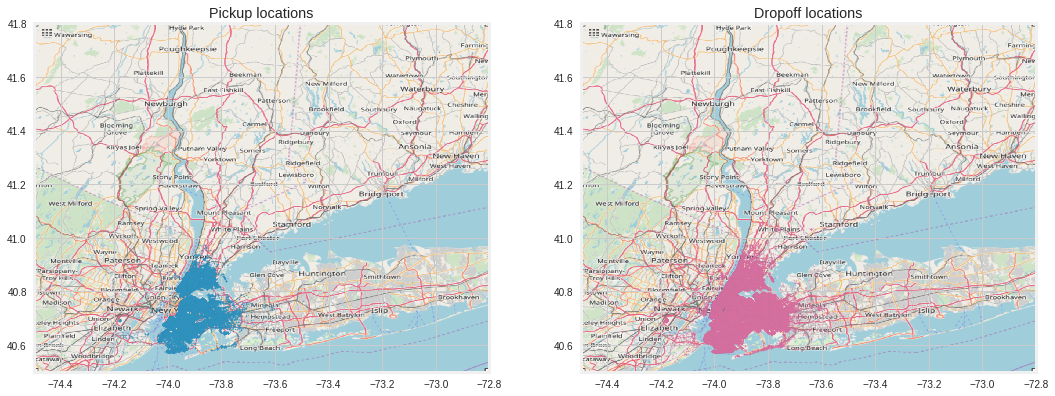

In [116]:
# plot the data on map
plot_on_map(df, BB, nyc_map, s=1, alpha=0.3)

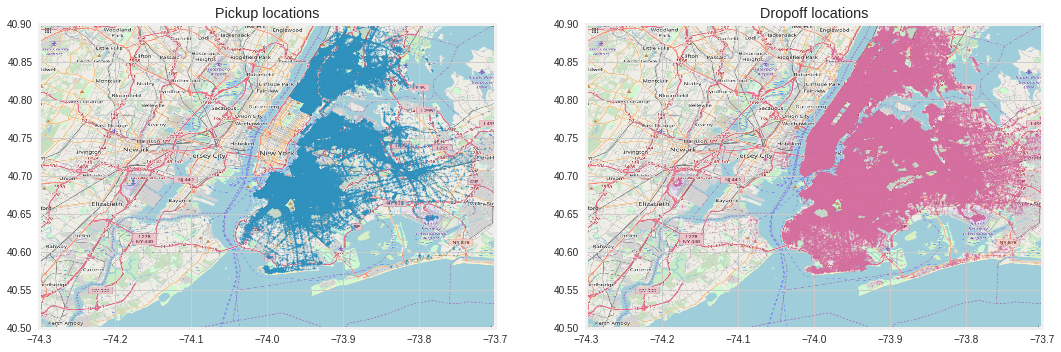

In [117]:
# plot data on map zoomed in
plot_on_map(df, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

In [0]:
# For this plot, we will need a function to calculate the distance between locations in latitude & longitude coordinates.
# This function is based on https://stackoverflow.com/questions/27928/
# Notes:
# Multiplied by 0.621371 to convert to miles in the returned result
# R = 6371 km ,Mean radius of Earth in Km

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Math: PI / 180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) 
  
# First calculate two arrays with datapoint density per sq mile
n_lon, n_lat = 200, 200 # number of grid bins per longitude, latitude dimension
density_pickup, density_dropoff = np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon)) # prepare arrays

# To calculate the number of datapoints in a grid area, the numpy.digitize() function is used. 
# This function needs an array with the (location) bins for counting the number of datapoints per bin.
bins_lon = np.zeros(n_lon+1) # bin
bins_lat = np.zeros(n_lat+1) # bin
delta_lon = (BB[1]-BB[0]) / n_lon # bin longutide width
delta_lat = (BB[3]-BB[2]) / n_lat # bin latitude height
bin_width_miles = distance(BB[2], BB[1], BB[2], BB[0]) / n_lon # bin width in miles
bin_height_miles = distance(BB[3], BB[0], BB[2], BB[0]) / n_lat # bin height in miles
for i in range(n_lon+1):
    bins_lon[i] = BB[0] + i * delta_lon
for j in range(n_lat+1):
    bins_lat[j] = BB[2] + j * delta_lat
    
# Digitize per longitude, latitude dimension
inds_pickup_lon = np.digitize(df.Pickup_longitude, bins_lon)
inds_pickup_lat = np.digitize(df.Pickup_latitude, bins_lat)
inds_dropoff_lon = np.digitize(df.Dropoff_longitude, bins_lon)
inds_dropoff_lat = np.digitize(df.Dropoff_latitude, bins_lat)

# Count per grid bin
# note: as the density_pickup will be displayed as image, the first index is the y-direction, 
#       the second index is the x-direction. Also, the y-direction needs to be reversed for
#       properly displaying (therefore the (n_lat-j) term)
dxdy = bin_width_miles * bin_height_miles
for i in range(n_lon):
    for j in range(n_lat):
        density_pickup[j, i] = np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==(n_lat-j))) / dxdy
        density_dropoff[j, i] = np.sum((inds_dropoff_lon==i+1) & (inds_dropoff_lat==(n_lat-j))) / dxdy

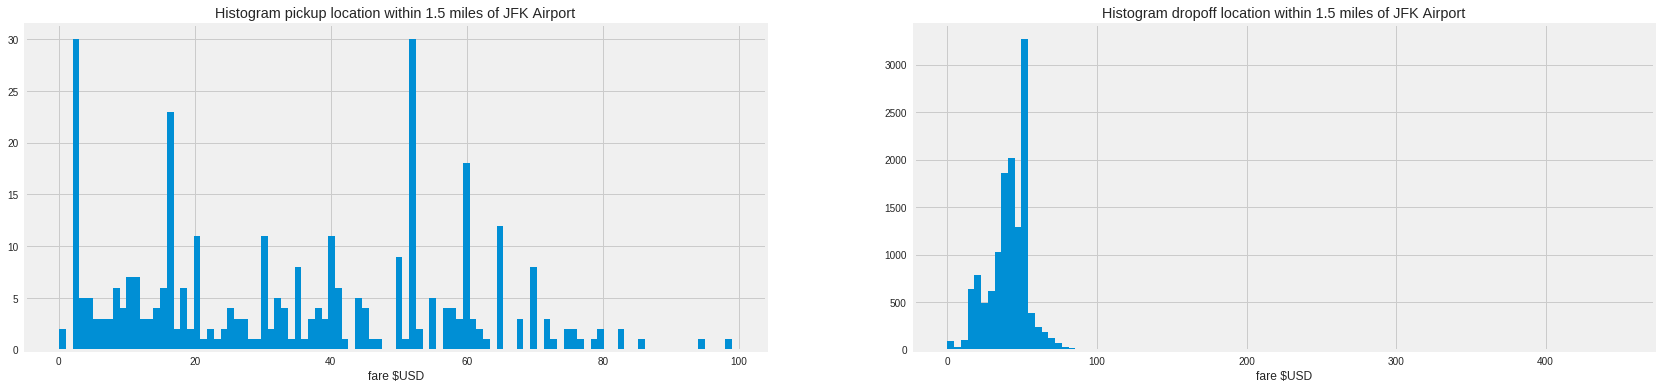

In [119]:
# This function will identify if the pickup-dropoff was in an airport.
# JFK, EWR and LGA airport coordinates, from https://www.travelmath.com/airport/
# I will do the JFK first and then the other airports.
# JFK, John F. Kennedy International Airport
# EWR, Newark Liberty International Airport
# LGA, LaGuardia Airport

JFK = (-73.7822222222, 40.6441666667)
nyc = (-74.0063889, 40.7141667)

def plot_location_fare(loc, name, range=1.5, color='cornflowerblue'):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1, 2, figsize=(26, 6))
    idx = (distance(df.Pickup_latitude, df.Pickup_longitude, loc[1], loc[0]) < range)
    df[idx].Fare_amount.hist(bins=100, ax=axs[0])
    axs[0].set_xlabel('fare $USD')
    axs[0].set_title('Histogram pickup location within {} miles of {}'.format(range, name))

    idx = (distance(df.Dropoff_latitude, df.Dropoff_longitude, loc[1], loc[0]) < range)
    df[idx].Fare_amount.hist(bins=100, ax=axs[1])
    axs[1].set_xlabel('fare $USD')
    axs[1].set_title('Histogram dropoff location within {} miles of {}'.format(range, name));
  
plot_location_fare(JFK, 'JFK Airport')  

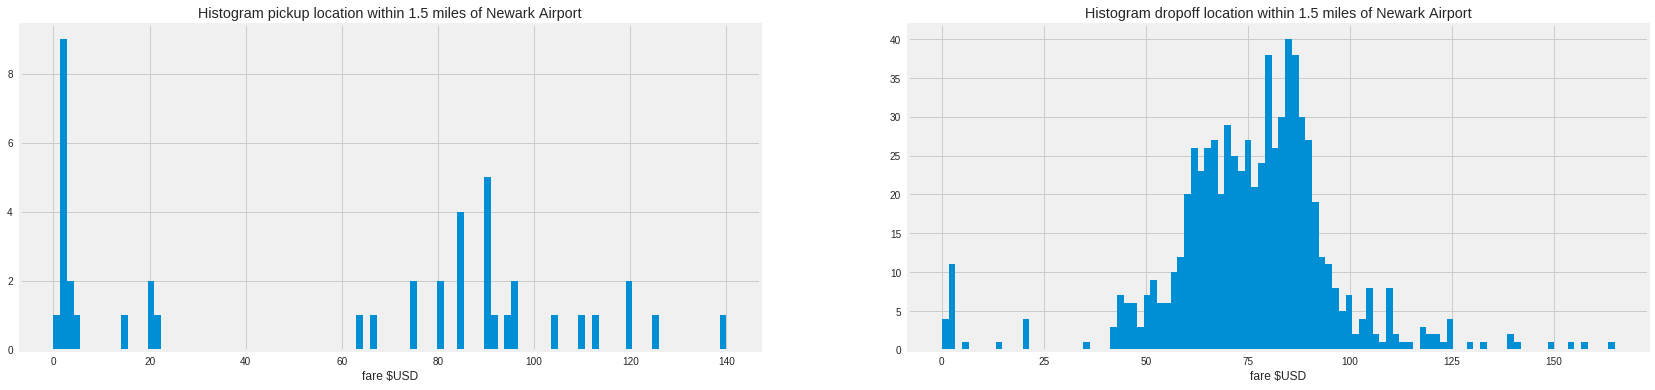

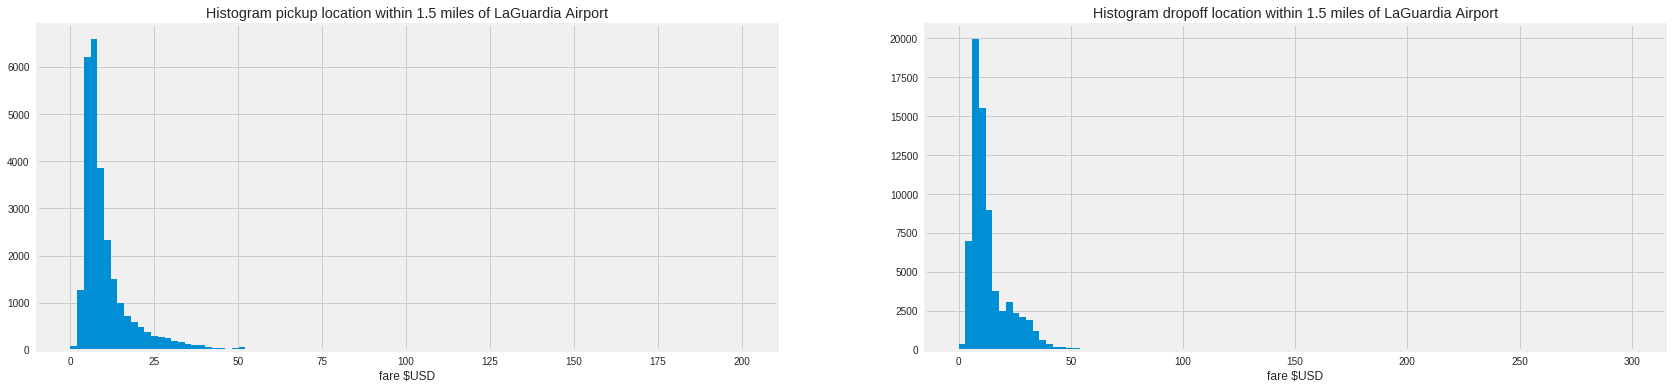

In [120]:

EWR = (-74.175, 40.69) # Newark Liberty International Airport
LGA = (-73.87, 40.77) # LaGuardia Airport, 
plot_location_fare(EWR, 'Newark Airport')
plot_location_fare(LGA, 'LaGuardia Airport')

In [0]:
# this a helper function to identify whether or not the pickup/dropoff took place at an airport.
def NYC_Airports(row):
    if (
        ((row['Pickup_longitude'] < -73.750296) & (row['Pickup_longitude'] > -73.821884) & 
       (row['Pickup_latitude'] < 40.666467) & (row['Pickup_latitude']>40.646677)) |  
        (
       (row['Dropoff_longitude'] < -73.750296) & (row['Dropoff_longitude'] > -73.821884) &
       (row['Dropoff_latitude'] < 40.666467) & (row['Dropoff_latitude']>40.646677)) ):
        
        return 'JFK' # John F. Kennedy International Airport
    
    if (
        ((row['Pickup_longitude'] < -73.865387) & (row['Pickup_longitude'] > -73.884547) & 
       (row['Pickup_latitude'] < 40.773098) & (row['Pickup_latitude']>40.767550)) | 
        (
       (row['Dropoff_longitude'] < -73.865387) & (row['Dropoff_longitude'] > -73.884547) &
       (row['Dropoff_latitude'] < 40.773098) & (row['Dropoff_latitude']>40.767550)) ):
        
        return 'LGA' # LaGuardia Airport
     
    if (
        ((row['Pickup_longitude'] <-74.15898 ) & (row['Pickup_longitude'] > -74.189765) & 
       (row['Pickup_latitude'] < 40.712632) & (row['Pickup_latitude']>40.686247)) | 
        (
       (row['Dropoff_longitude'] <-74.16898 ) & (row['Dropoff_longitude'] >  -74.187765) &
       (row['Dropoff_latitude'] < 40.712632) & (row['Dropoff_latitude']>40.676247)) ):
        
        return 'EWR' # Newark Airport 
      
    else:
        return 'NOT an Airpot Trip' # Not an Airport pickup/dropoff

In [0]:
df['Airport'] = df.apply (NYC_Airports, axis=1)

In [123]:
# what's the distribution of the rides. 
df['Airport'].value_counts() 

NOT an Airpot Trip    1478327
LGA                      5204
JFK                      4685
EWR                       717
Name: Airport, dtype: int64

In [124]:
print('Average fair for an airport trip : {:0.2f}'.format(df[df['Airport']!= 'NOT an Airpot Trip']['Fare_amount'].mean()))
print('number of trips satisfying the criteria:',df[df['Airport']!='NOT an Airpot Trip']['Fare_amount'].shape[0])
print('Average fair for a non-airport trip : {:0.2f}'.format(df[df['Airport']=='NOT an Airpot Trip']['Fare_amount'].mean()))

Average fair for an airport trip : 29.94
number of trips satisfying the criteria: 10606
Average fair for a non-airport trip : 12.45


**Based on the graphs above, we can see that**

* Passengers tend to travel to and from LaGuardia using green taxis as they are closer to the NYC  and have a shorter travel distance as well.
* Passengers using JFK and Newark have a high travel distance and lesser count, comparatively.

* Trips distances to and from airports tend to be around 20 miles (with a minimum of 12 miles from NYC to LaGuardia and a maximum of 20 miles from NYC to Newark), while trips not originating or terminating at airports cover shorter distances with most travels within 5 miles.

* The distribution for the pick-up hour is nearly the same for airport and non-airport pick-ups, with airport pick-up hour peaking at 03:00 PM and non-airport pick-ups peaking at around 07:00 PM. I can hypothesise that passengers commuting within city, tend to take taxis when they need late night travel and commuters to airports (based on the http://www.businessinsider.com/heres-why-new-york-city-air-traffic-is-so-congested-2015-7 report) like to travel from early hours to mid-day, this trend can be found in the graphs.

* The distribution of trip duration shows how travelling in the city for shorter distances takes shorter time (with most data points around 0 to 20 mins) and the airport trips last longer (with most data points around 50 mins). The longer travel distance for Airport area can be credit to the tourists, most of whom on a tight schedule would want to cover attractions or have a stop-over at friends before their destination, or a passenger opting for a round-about trip while dropping off or picking up their friends or relatives at airports.

# Question 4
**Build a derived variable for tip as a percentage of the total fare.**

Before we proceed, some cleaning is reuqired. Since the initial charge for NYC green taxi is $2.5, any transaction with a smaller total amount is invalid, so I'll drop them.

In [125]:
df = df[(df.Total_amount>=2.5)] 
df['Tip_percentage'] = 100*df.Tip_amount/df.Total_amount
print ("Summary: Tip percentage\n",df.Tip_percentage.describe())

Summary: Tip percentage
 count    1.484512e+06
mean     6.668892e+00
std      8.869122e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e+01
max      1.000000e+02
Name: Tip_percentage, dtype: float64


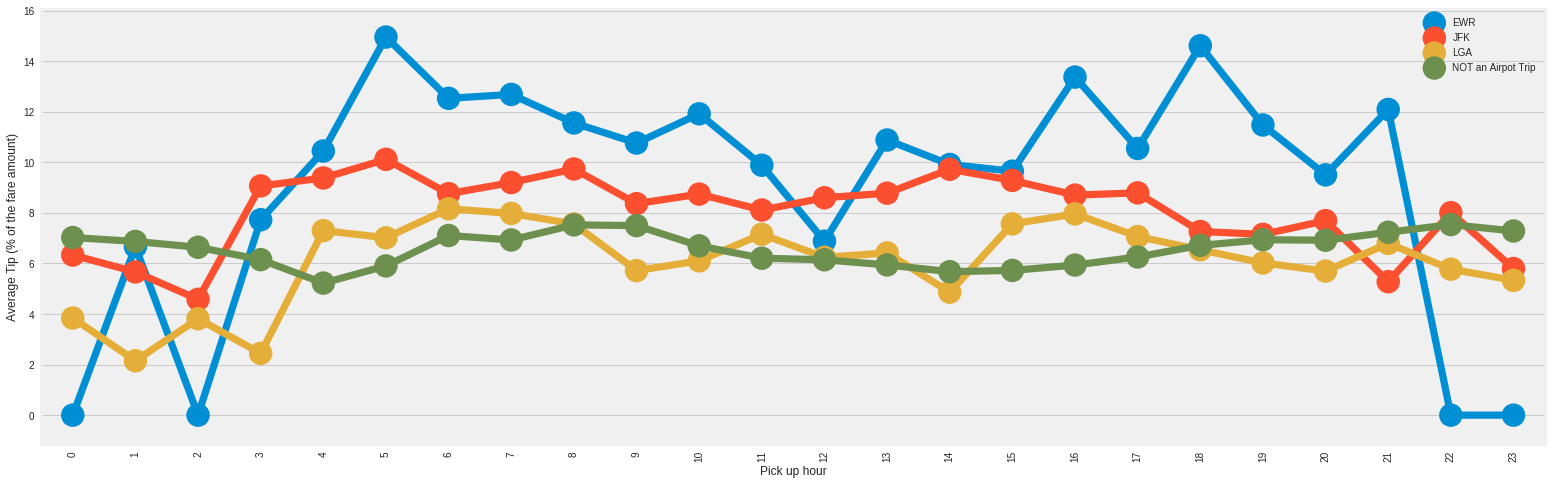

In [126]:
grouped_df = df.groupby(['HourOfDay', 'Airport'])['Tip_percentage'].aggregate(np.mean).reset_index() #average tip
plt.figure(figsize=(24,8))
sns.pointplot(grouped_df.HourOfDay.values, grouped_df.Tip_percentage.values, grouped_df.Airport.values, alpha=0.6)
plt.ylabel('Average Tip (% of the fare amount)')
plt.xlabel('Pick up hour')
plt.xticks(rotation='vertical')
plt.show()

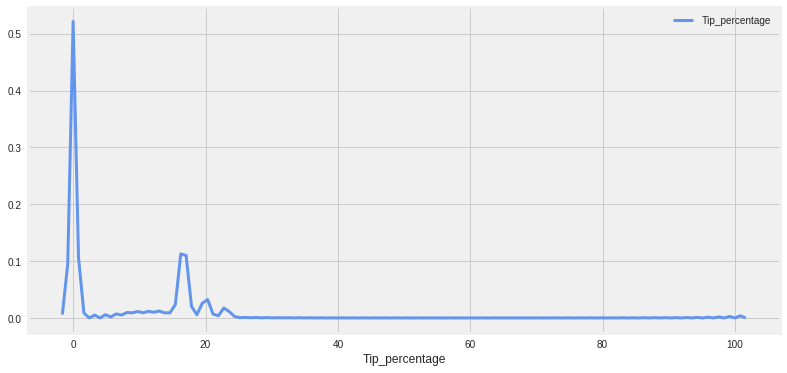

In [127]:
sns.set_color_codes()
rcParams['figure.figsize'] = 12, 6
sns.distplot(df['Tip_percentage'], hist=False,
             kde_kws={"color": "cornflowerblue", "lw": 3,
                      "label": "Tip_percentage",
                     'alpha':1.0})

# Question 4
**b)Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work.**

**1) data cleaning**

In [0]:
# Here, we will define a function to clean the data before buidling model

def clean_data(data_set):
    """
    This function will clean the input data_set:
    . drop Ehail_fee [99% transactions are NaNs]
    . impute missing values in Trip_type
    . replace invalid data by most frequent value for RateCodeID and Extra
    . encode categorical to numeric
    . rename pickup and dropff time variables (for later use)

    """
    # making a copy of the input
    data = df.copy()
    # drop Ehail_fee: most its values are NaNs
    if 'Ehail_fee' in data.columns:
        data.drop('Ehail_fee',axis=1,inplace=True)

    # replace missing values in Trip_type with the most frequent value 1
    data['Trip_type '] = data['Trip_type '].replace(np.NaN,1)
    
    ## replace all values that are not allowed as per the variable dictionary with the most frequent allowable value
    # remove negative values from Total amound and Fare_amount
    print ("Negative values found and replaced by their abs")
    print ("Total_amount", 100*data[data.Total_amount<0].shape[0]/float(data.shape[0]),"%")
    print ("Fare_amount", 100*data[data.Fare_amount<0].shape[0]/float(data.shape[0]),"%")
    print ("Improvement_surcharge", 100*data[data.improvement_surcharge<0].shape[0]/float(data.shape[0]),"%")
    print ("Tip_amount", 100*data[data.Tip_amount<0].shape[0]/float(data.shape[0]),"%")
    print ("Tolls_amount", 100*data[data.Tolls_amount<0].shape[0]/float(data.shape[0]),"%")
    print ("MTA_tax", 100*data[data.MTA_tax<0].shape[0]/float(data.shape[0]),"%")
    data.Total_amount = data.Total_amount.abs()
    data.Fare_amount = data.Fare_amount.abs()
    data.improvement_surcharge = data.improvement_surcharge.abs()
    data.Tip_amount = data.Tip_amount.abs()
    data.Tolls_amount = data.Tolls_amount.abs()
    data.MTA_tax = data.MTA_tax.abs()
    
    # RateCodeID
    indices_oi = data[~((data.RateCodeID>=1) & (data.RateCodeID<=6))].index
    data.loc[indices_oi, 'RateCodeID'] = 2 # 2 = Cash payment was identified as the common method
    print (round(100*len(indices_oi)/float(data.shape[0]),2),"% of values in RateCodeID were invalid.--> Replaced by the most frequent 2")
    
    # Extra
    indices_oi = data[~((data.Extra==0) | (data.Extra==0.5) | (data.Extra==1))].index
    data.loc[indices_oi, 'Extra'] = 0 # 0 was identified as the most frequent value
    print (round(100*len(indices_oi)/float(data.shape[0]),2),"% of values in Extra were invalid.--> Replaced by the most frequent 0")
    
    # Total_amount: the minimum charge is $2.5, so I will replace every thing less than 2.5 by the median 1.76
    indices_oi = data[(data.Total_amount<2.5)].index
    data.loc[indices_oi,'Total_amount'] = 1.76
    print (round(100*len(indices_oi)/float(data.shape[0]),2),"% of values in total amount worth <$2.5.--> Replaced by the median 1.76")
    
    # encode categorical to numeric (I avoid to use dummy to keep dataset small)
    if data.Store_and_fwd_flag.dtype.name != 'int64':
        data['Store_and_fwd_flag'] = (data.Store_and_fwd_flag=='Y')*1
    
    return data

In [129]:
# Run code to clean the data
df = clean_data(df)

Negative values found and replaced by their abs
Total_amount 0.0 %
Fare_amount 0.0 %
Improvement_surcharge 0.0 %
Tip_amount 0.0 %
Tolls_amount 0.0 %
MTA_tax 0.0 %
0.0 % of values in RateCodeID were invalid.--> Replaced by the most frequent 2
0.0 % of values in Extra were invalid.--> Replaced by the most frequent 0
0.0 % of values in total amount worth <$2.5.--> Replaced by the median 1.76


**2) Exploratory Data Analysis**

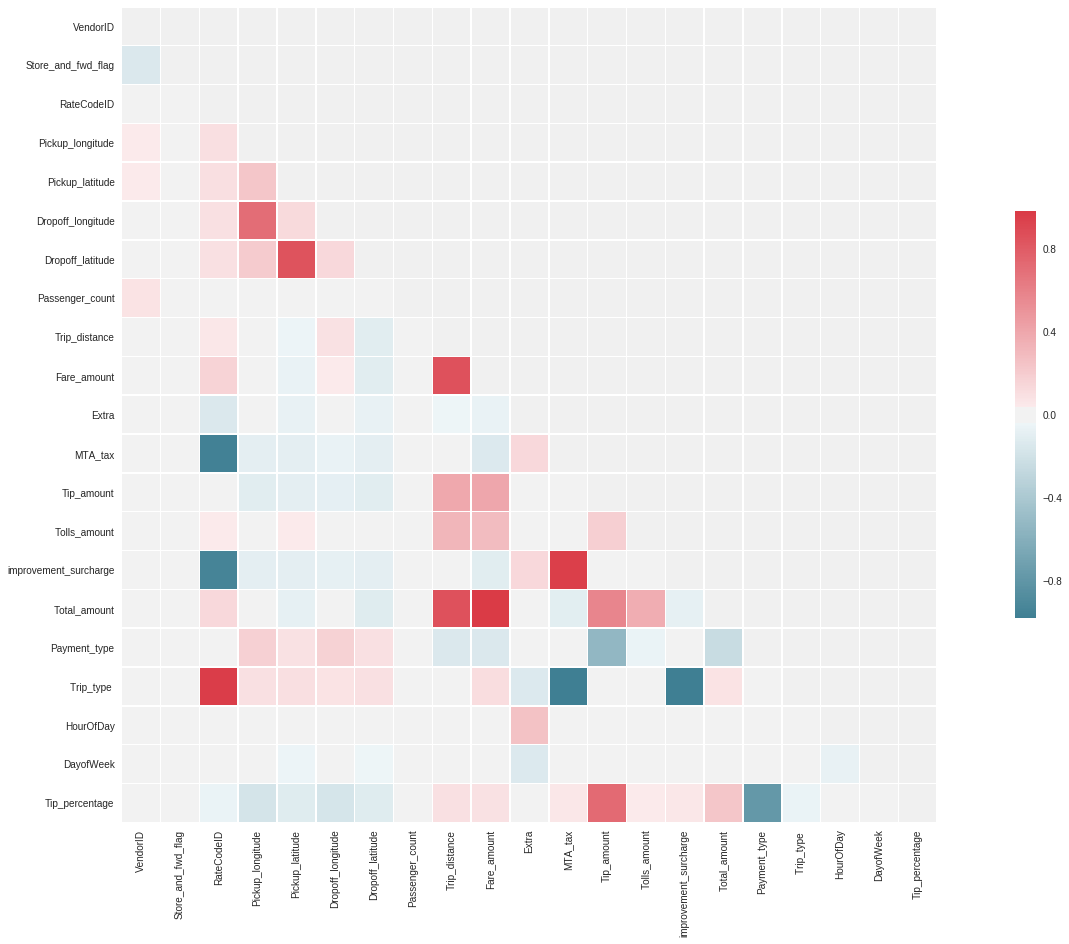

In [130]:
# Feature Correlation Analysis:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [0]:
df['Trip_duration'] =  (df['Lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).astype('timedelta64[s]')
df['Avg_speed'] = df['Trip_distance']/df['Trip_duration']
# There is a 25mph speed limit on NYC 
df= df[df['Avg_speed'] <= 0.00694444]
df = df.dropna(axis = 0)

In [0]:
Trips_With_Tip = df[df.Tip_percentage>0] # rides with tips
vars_of_interest=['Total_amount','Tip_percentage','Fare_amount','Airport','Trip_distance','Avg_speed','Trip_duration','Tolls_amount', 'Payment_type', 'Trip_type ']

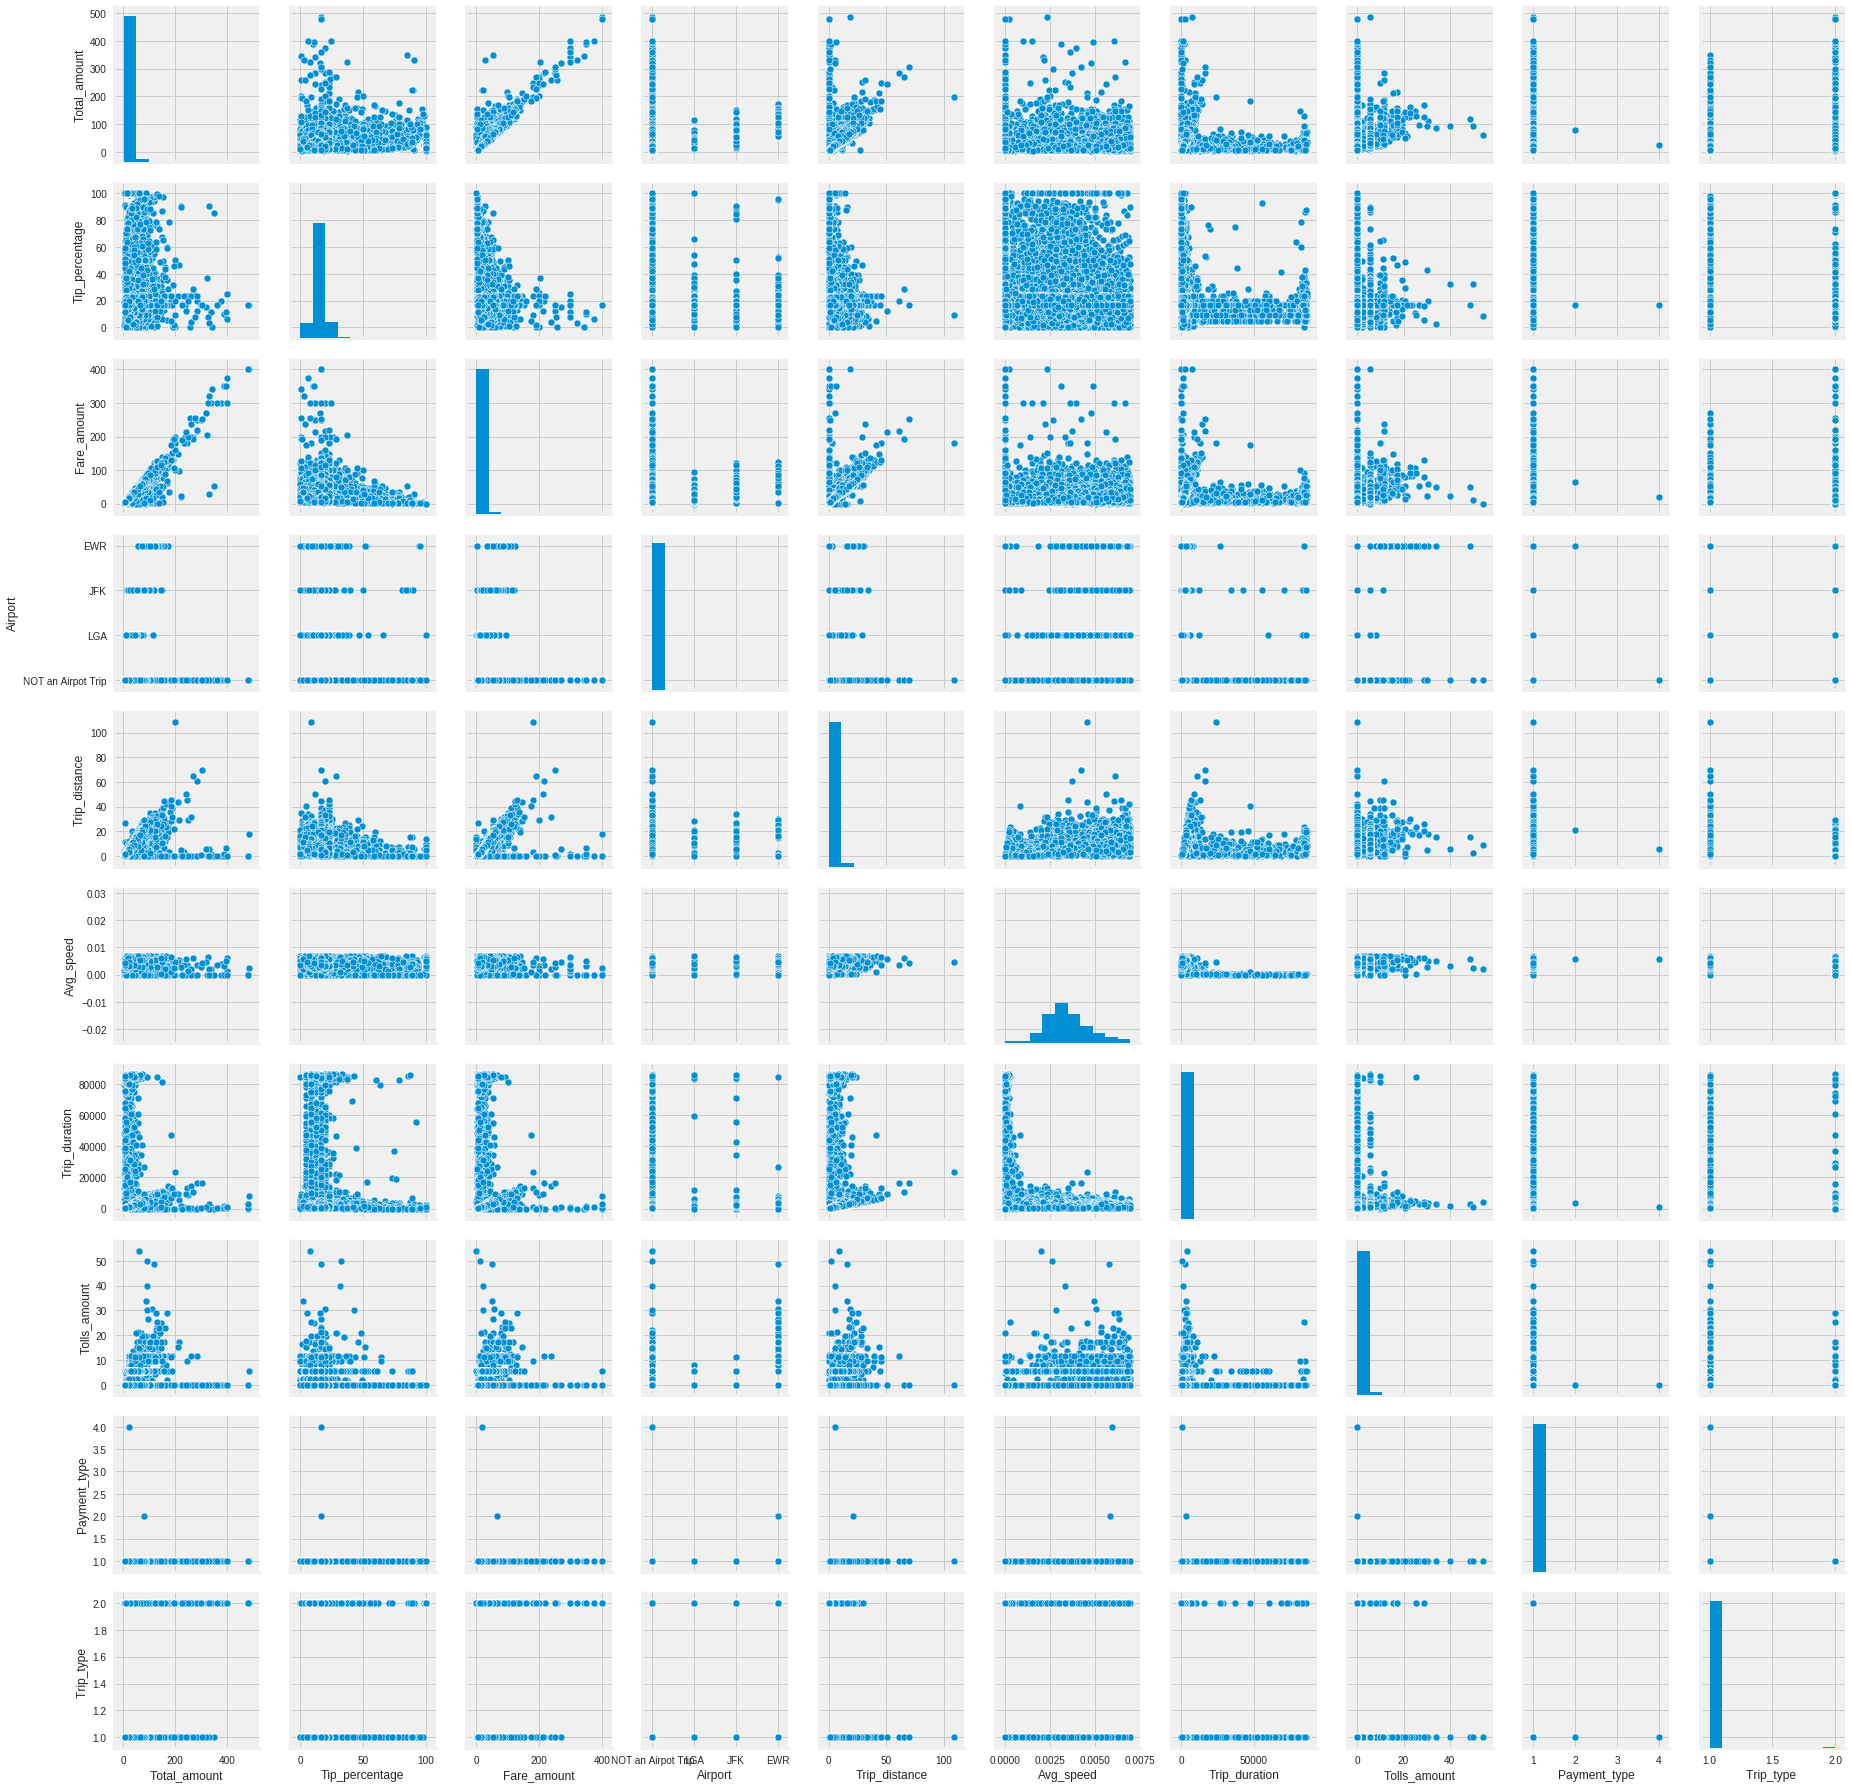

In [133]:
# Visualize pairwise relationships between quantitative features 
sns.pairplot(Trips_With_Tip[vars_of_interest], 
             vars =vars_of_interest )

Clearly Payment_type shows a direct relation with the binomial variable Tip given as well as the percentage of Tip. One could also spot some positive correlation between Trip duration and Tip as percentage.

**3) Building the Model** 

This model will be a classification model:
*  The classification model to classify a trip into with tip (=1) or no tip (=0)
*  Feature Importance

In [0]:
# before moving forward, let's make sure  our target variable is propely defined
df['Trips_With_Tip'] = (df.Tip_percentage>0)*1 # rides with tips

In [135]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag                int64
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                       float64
HourOfDay                         int64
DayofWeek                         int64
Airport                          object
Tip_percentage                  float64
Trip_duration                   float64


In [136]:
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                0
HourOfDay                0
DayofWeek                0
Airport                  0
Tip_percentage           0
Trip_duration            0
Avg_speed                0
Trips_With_Tip           0
dtype: int64

First of all, functions for cross-validation and parameter optimization were defined such that they can be used on either classification or regression algorithm

In [0]:
# define a function that help to train models and perform cv
def modelfit(alg,dtrain,predictors,target,scoring_method,performCV=True,printFeatureImportance=True,cv_folds=5):
    """
    This functions train the model given as 'alg' by performing cross-validation. It works on both regression and classification
    alg: sklearn model
    dtrain: pandas.DataFrame, training set
    predictors: list, labels to be used in the model training process. They should be in the column names of dtrain
    target: str, target variable
    scoring_method: str, method to be used by the cross-validation to valuate the model
    performCV: bool, perform Cv or not
    printFeatureImportance: bool, plot histogram of features importance or not
    cv_folds: int, degree of cross-validation
    """
    # train the algorithm on data
    alg.fit(dtrain[predictors],dtrain[target])
    #predict on train set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    if scoring_method == 'roc_auc':
        dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
   
    #perform cross-validation
    if performCV:
        cv_score = cross_val_score(alg,dtrain[predictors],dtrain[target],cv=cv_folds,scoring=scoring_method)
        #print model report
        print( "\nModel report:")
        if scoring_method == 'roc_auc':
            print ("Accuracy:",metrics.accuracy_score(dtrain[target].values,dtrain_predictions))
            print ("AUC Score (Train):",metrics.roc_auc_score(dtrain[target], dtrain_predprob))
        if (scoring_method == 'mean_squared_error'):
         # mean_squared_error(y_true, y_pred)
            print ("Accuracy:",mean_squared_error(dtrain[target].values,dtrain_predictions))
    if performCV:
        print ("CV Score - Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    #print feature importance
    if printFeatureImportance:
        if dir(alg)[0] == '_Booster': #runs only if alg is xgboost
            feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
        else:
            feat_imp = pd.Series(alg.feature_importances_,predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importances')
        plt.ylabel('Feature Importe Score')
        plt.show()

# optimize n_estimator through grid search
def optimize_num_trees(alg,param_test,scoring_method,train,predictors,target):
    """
    This functions is used to tune paremeters of a predictive algorithm
    alg: sklearn model,
    param_test: dict, parameters to be tuned
    scoring_method: str, method to be used by the cross-validation to valuate the model
    train: pandas.DataFrame, training data
    predictors: list, labels to be used in the model training process. They should be in the column names of dtrain
    target: str, target variable
    """
    gsearch = GridSearchCV(estimator=alg, param_grid = param_test, scoring=scoring_method,n_jobs=2,iid=False,cv=5)
    gsearch.fit(train[predictors],train[target])
    return gsearch

# plot optimization results
def plot_opt_results(alg):
    cv_results = []
    for i in range(len(param_test['n_estimators'])):
        cv_results.append((alg.grid_scores_[i][1],alg.grid_scores_[i][0]['n_estimators']))
    cv_results = pd.DataFrame(cv_results)
    plt.plot(cv_results[1],cv_results[0])
    plt.xlabel('# trees')
    plt.ylabel('score')
    plt.title('optimization report')

** Classification Model:**

We are discovering that the "Payment_type" has a strong variable (99.99% of all transactions with tips were paid with credit cards) to differentiate transactions with tip from those without tip. 
So, a model based on the logistic regression classifier algorithm was optimized and gave an accuracy score of 0.95.

*  Key point:
ROC-AUC (Area under the curve of receiver operating characteristic) was used as a model validation metric

{'mean_fit_time': array([85.62302809]), 'std_fit_time': array([17.15871726]), 'mean_score_time': array([0.3894052]), 'std_score_time': array([0.06660888]), 'param_n_estimators': masked_array(data=[30],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 30}], 'split0_test_score': array([0.99366893]), 'split1_test_score': array([0.99304054]), 'split2_test_score': array([0.9924692]), 'split3_test_score': array([0.99268417]), 'split4_test_score': array([0.99312369]), 'mean_test_score': array([0.99299731]), 'std_test_score': array([0.00041131]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([0.99347946]), 'split1_train_score': array([0.99379662]), 'split2_train_score': array([0.99275901]), 'split3_train_score': array([0.99251479]), 'split4_train_score': array([0.9928533]), 'mean_train_score': array([0.99308064]), 'std_train_score': array([0.00047896])} {'n_estimators': 30} 0.99299730750026

Model report:
Accurac

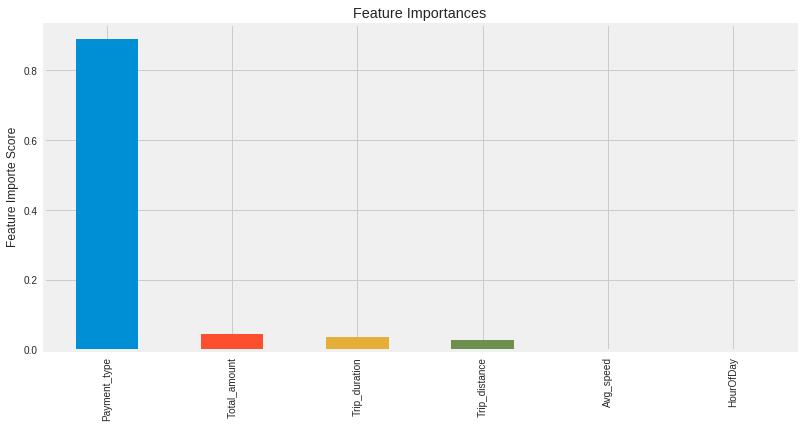

In [138]:
## OPTIMIZATION & TRAINING OF THE CLASSIFIER

train = df.copy() # make a copy of the training set

target = 'Trips_With_Tip' # set target variable - it will be used later in optimization

# for predictors start with candidates identified during the EDA
predictors = ['Payment_type','Total_amount','Trip_duration','Trip_distance',
              'HourOfDay','Avg_speed']

# optimize n_estimator through grid search
param_test = {'n_estimators':range(30,50,20)} # define range over which number of trees is to be optimized


# initiate classification model
model_cls = GradientBoostingClassifier(
    learning_rate=0.1, # use default
    min_samples_split=2,# use default
    max_depth=5,
    max_features='auto',
    subsample=0.8, # try <1 to decrease variance and increase bias
    random_state = 10)

# get results of the search grid
gs_cls = optimize_num_trees(model_cls,param_test,'roc_auc',train,predictors,target)
print (gs_cls.cv_results_, gs_cls.best_params_, gs_cls.best_score_)

# cross validate the best model with optimized number of estimators
modelfit(gs_cls.best_estimator_,train,predictors,target,'roc_auc')

**Recommendations:**
Based on the above analysis if I had to make recommendations to Green Taxi owners to maximize profits, I would suggest the following:

*  Installing a credit card reader in their cabs, since that leads to higher tip percentages.
*  Operating between 2pm to 6pm in order to maximize the chances of getting a passenger.
*  Answering Dispatch calls since they lead to higher Trip distances, hence higher profits

# Question 5

**Option A: Distributions**



*   Build a derived variable representing the average speed over the course of a trip.
* Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?
* Can you build up a hypothesis of average trip speed as a function of time of day?




In [139]:
#Avg_speed = Trip_distance/Trip_duration
# df['Avg_speed'] = df['Trip_distance']/df['Trip_duration']
df['Avg_speed'].describe()

count    1.414799e+06
mean     3.336797e-03
std      1.243620e-03
min      0.000000e+00
25%      2.556653e-03
50%      3.207547e-03
75%      4.011166e-03
max      6.944310e-03
Name: Avg_speed, dtype: float64

In [0]:
df['Trip_duration'] =  (df['Lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).astype('timedelta64[s]')
df['Avg_speed'] = df['Trip_distance']/df['Trip_duration']

In [0]:
#There is a 25mph speed limit on NYC taxis and hence can filter out Average speeds from the data that contains speeds more than that.
df= df[df['Avg_speed'] <= 0.00694444] #25 miles per hour

In [142]:
df['Week_of_Month'] = df['lpep_pickup_datetime'].apply(lambda d: (d.day-1) // 7 + 1)
df.groupby('Week_of_Month')['Avg_speed'].mean()

Week_of_Month
1    0.003465
2    0.003252
3    0.003274
4    0.003404
5    0.003201
Name: Avg_speed, dtype: float64

Text(0.5, 0, 'Week of Month')

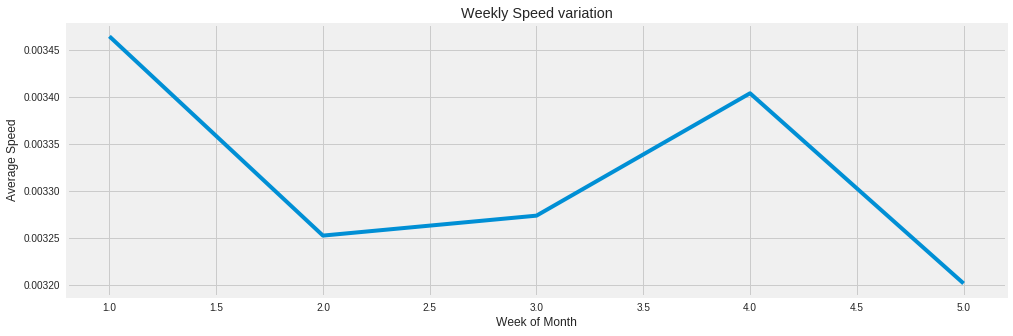

In [143]:
rcParams['figure.figsize'] = 15, 5
df.groupby('Week_of_Month')['Avg_speed'].mean().plot(kind='line')
plt.title('Weekly Speed variation')
plt.ylabel('Average Speed')
plt.xlabel('Week of Month')

Text(0.5, 1.0, 'Boxplot for Weekly speed variation')

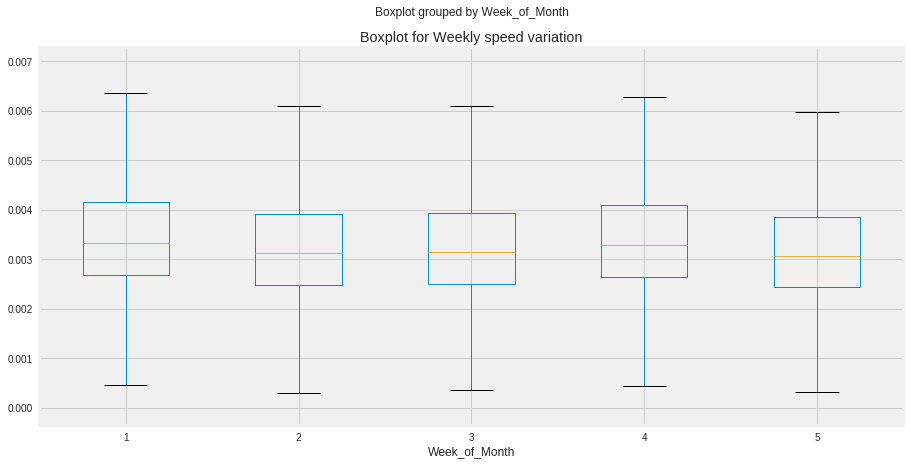

In [144]:
rcParams['figure.figsize'] = 15, 7
df.boxplot('Avg_speed', by='Week_of_Month')
plt.title('Boxplot for Weekly speed variation')


In [145]:
Week0 = df['Avg_speed'][df['Week_of_Month'] == 1]
Week1 = df['Avg_speed'][df['Week_of_Month'] == 2]
Week2 = df['Avg_speed'][df['Week_of_Month'] == 3]
Week3 = df['Avg_speed'][df['Week_of_Month'] == 4]
Week4 = df['Avg_speed'][df['Week_of_Month'] == 5]

Weeks = [Week0,Week1, Week2,Week3,Week4]
headers = ["Week", "F_Statstic", "P_value"]
table =[]

for i in range(len(Weeks)):
    k = i + 1
    while(k <=4):
        Week = "Week_"+str(i+1)+"_"+str(k+1)
        a = Weeks[i]
        b = Weeks[k]
        Fab, pab = stats.f_oneway(a, b)
        table.append([Week,Fab,pab])
        #print(Week, a, b)
        k = k + 1
        
print(tabulate(table, headers, tablefmt="fancy_grid"))

╒══════════╤══════════════╤═════════════╕
│ Week     │   F_Statstic │     P_value │
╞══════════╪══════════════╪═════════════╡
│ Week_1_2 │    4829.07   │ 0           │
├──────────┼──────────────┼─────────────┤
│ Week_1_3 │    3961.73   │ 0           │
├──────────┼──────────────┼─────────────┤
│ Week_1_4 │     378.629  │ 2.61724e-84 │
├──────────┼──────────────┼─────────────┤
│ Week_1_5 │    3070.96   │ 0           │
├──────────┼──────────────┼─────────────┤
│ Week_2_3 │      50.9022 │ 9.71808e-13 │
├──────────┼──────────────┼─────────────┤
│ Week_2_4 │    2455.46   │ 0           │
├──────────┼──────────────┼─────────────┤
│ Week_2_5 │     117.049  │ 2.82348e-27 │
├──────────┼──────────────┼─────────────┤
│ Week_3_4 │    1839.15   │ 0           │
├──────────┼──────────────┼─────────────┤
│ Week_3_5 │     238.966  │ 6.83252e-54 │
├──────────┼──────────────┼─────────────┤
│ Week_4_5 │    1810.38   │ 0           │
╘══════════╧══════════════╧═════════════╛


In [146]:
F, p = stats.f_oneway(Week0,Week1, Week2,Week3,Week4)
print("F statistic", F)
print("p-value", p)

F statistic 1965.6171117954593
p-value 0.0


Text(0, 0.5, 'Traffic of Green Taxi')

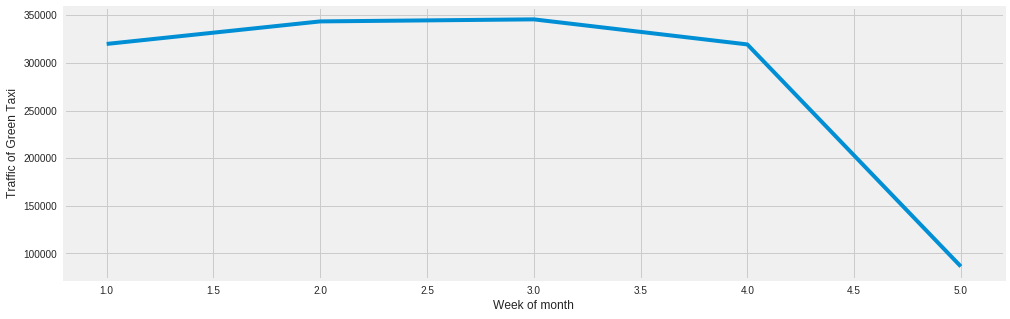

In [147]:
rcParams['figure.figsize'] = 15, 5
df.groupby('Week_of_Month')['Avg_speed'].count().plot()
plt.xlabel('Week of month')
plt.ylabel('Traffic of Green Taxi')

In [148]:
GroupedByHOD = df.groupby('HourOfDay')['Avg_speed'].mean().reset_index()
GroupedByHOD

,HourOfDay,Avg_speed
0,0,0.003730
1,1,0.003780
2,2,0.003815
3,3,0.003850
4,4,0.003903
5,5,0.004144
6,6,0.004065
7,7,0.003411
8,8,0.003155
9,9,0.003221


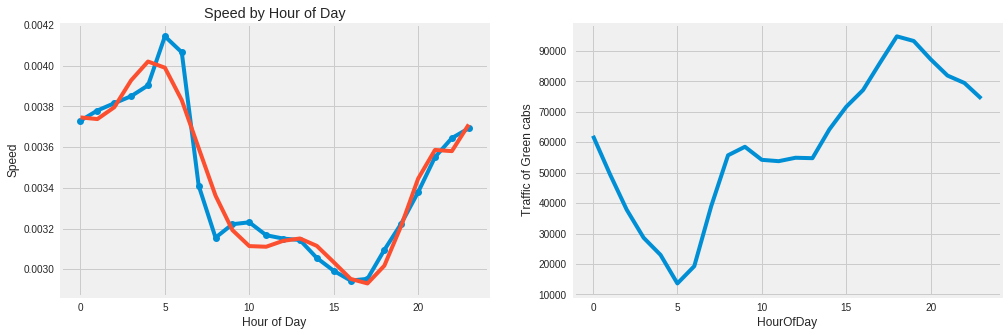

In [149]:
plt.subplot(1,2, 1)
X = GroupedByHOD['HourOfDay']
Y = GroupedByHOD['Avg_speed']

z = np.polyfit(X,Y,9) 
p = np.poly1d(z)

plt.title ('Speed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Speed')

plt.plot(X, Y,'o-')
plt.plot(X, p(X), '-')

plt.subplot(1,2, 2)
df.groupby('HourOfDay')['Avg_speed'].count().plot()
plt.ylabel('Traffic of Green cabs')
plt.show()

**Results:**
The p-value of the ANOVA test is very small and close to 0. Thus, the null hypothesis is rejected:

* the average trip speeds are not same for all hours.

A 2-sample t-test, with significance value set at 0.05, is performed on all the hours, to check if the means are same between any two hours, the results of p-value is given below:

* Hours 8:00 AM and 11:00 AM, 9:00 AM and 10:00 AM have the same mean - p-value is greater than significance value

* peak hour traffic would be nearly same, people start leaving for office around 7:00 AM and reach around 11:00 AM causing the average to be approximately same between 8:00 AM and 11:00 AM. Thus, the average speed is same.

* Hours 1:00 PM and 7:00 PM, 2:00 PM and 6:00 PM have the same mean - p-value is greater than significance value

* mid-day traffic and just after office hours traffic would be nearly same as roads would be cleared from morning rush hour (between 7 to 11 AM and evening rush hour 4-5 PM). Thus, the average speed is same.
* Hours 4:00 PM and 5:00 PM have the same mean - p-value is greater than significance value

* evening peak hour traffic would be nearly same, people start leaving from office around 4:00 PM causing the average speed to be approximately same for the remaining combination of hours, p-value is close to 0 and so they don't have the same means.

**My hypothesis for average speed variation (based on the boxplot) is below:**

average speed is increasing continuously from mid-night, 00:00 AM to 5:00 AM, as majority of the people would be home, and the roads would be empty

average speed dropped at 7:00 AM and continuous nearly the same during the morning peak hours, 7:00 AM to 11:00 AM, as people would be rushing to office

average speed is fluctuating during mid-day, 10:00 AM to 5:00 PM, schools would close, people will be running errands randomly and would start leaving office

average speed is increasing slowly after evening peak hours, 6:00 PM to 11:00 PM, as people would have reached home

# Reference

**A) General:**

**Python Language and packages**

1.   Python Software Foundation. Python Language Reference, version 3.6. Available at http://www.python.org
2.   Fabian Pedregosa, Gaël Varoquaux, Alexandre Gramfort, Vincent Michel, Bertrand Thirion, Olivier Grisel, Mathieu Blondel, Peter Prettenhofer, Ron Weiss, Vincent Dubourg, Jake Vanderplas, Alexandre Passos, David Cournapeau, Matthieu Brucher, Matthieu Perrot, Édouard Duchesnay. Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, 2825-2830 (2011) 
3.  Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/
4.  Travis E. Oliphant. Python for Scientific Computing, Computing in Science & Engineering, 9, 10-20 (2007)
5.  Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).
6.  Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007)
7.  John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007)
8.  Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010)

** B) Specific:**

1.  https://github.com/sabarna/NYC-Green-Cab-Data-Analysis/
2.  https://github.com/WillKoehrsen/taxi-fare/
3.  https://github.com/kthouz/NYC_Green_Taxi/
4.  https://www.kaggle.com/solozabar/nyc-taxis
5.  https://github.com/RishiSankineni/Capital-One-Data-Challenge/
6.  https://nycdatascience.com/blog/student-works/predict-new-york-city-taxi-demand/
7.  https://www.kdnuggets.com/2017/02/data-science-nyc-taxi-trips.html
8.  https://sdaulton.github.io/TaxiPrediction/
9.  https://github.com/googlecolab
10. https://github.com/bjherger/Capital-One-DS-Challenge
11.  http://www.businessinsider.com/heres-why-new-york-city-air-traffic-is-so-congested-2015-7
12.  https://www.travelmath.com/airport/
13.  https://stackoverflow.com/questions/27928/
14.  https://aiblog.nl/download/
15.  https://www.kaggle.com/breemen/nyc-taxi-fare-evaluating-models




